In [1]:
from tensorflow import convert_to_tensor, Tensor, constant

In [2]:
import os
import sys

In [4]:
imgpaths = {}
pth = './preprocessing_dataset/png'
for d in os.listdir(pth):
    if not os.path.isdir(pth + '/' + d):
        continue
    for img in os.listdir(pth + '/' + d):
        path = './dataset/png/'+ d
        if d not in imgpaths:
            imgpaths[d] = []
        imgpaths[d].append(path + '/' + img)

In [5]:
imgpaths.keys()

dict_keys(['airplane', 'alarm clock'])

In [6]:
imgpaths['airplane'][-20:-10]

['./dataset/png/airplane/64.png',
 './dataset/png/airplane/65.png',
 './dataset/png/airplane/66.png',
 './dataset/png/airplane/67.png',
 './dataset/png/airplane/68.png',
 './dataset/png/airplane/69.png',
 './dataset/png/airplane/7.png',
 './dataset/png/airplane/70.png',
 './dataset/png/airplane/71.png',
 './dataset/png/airplane/72.png']

In [7]:
from PIL import Image
import cv2

In [8]:
def get_one(filepath):
    v = Image.open(filepath)
    return v

In [9]:
v = get_one(imgpaths['airplane'][0])

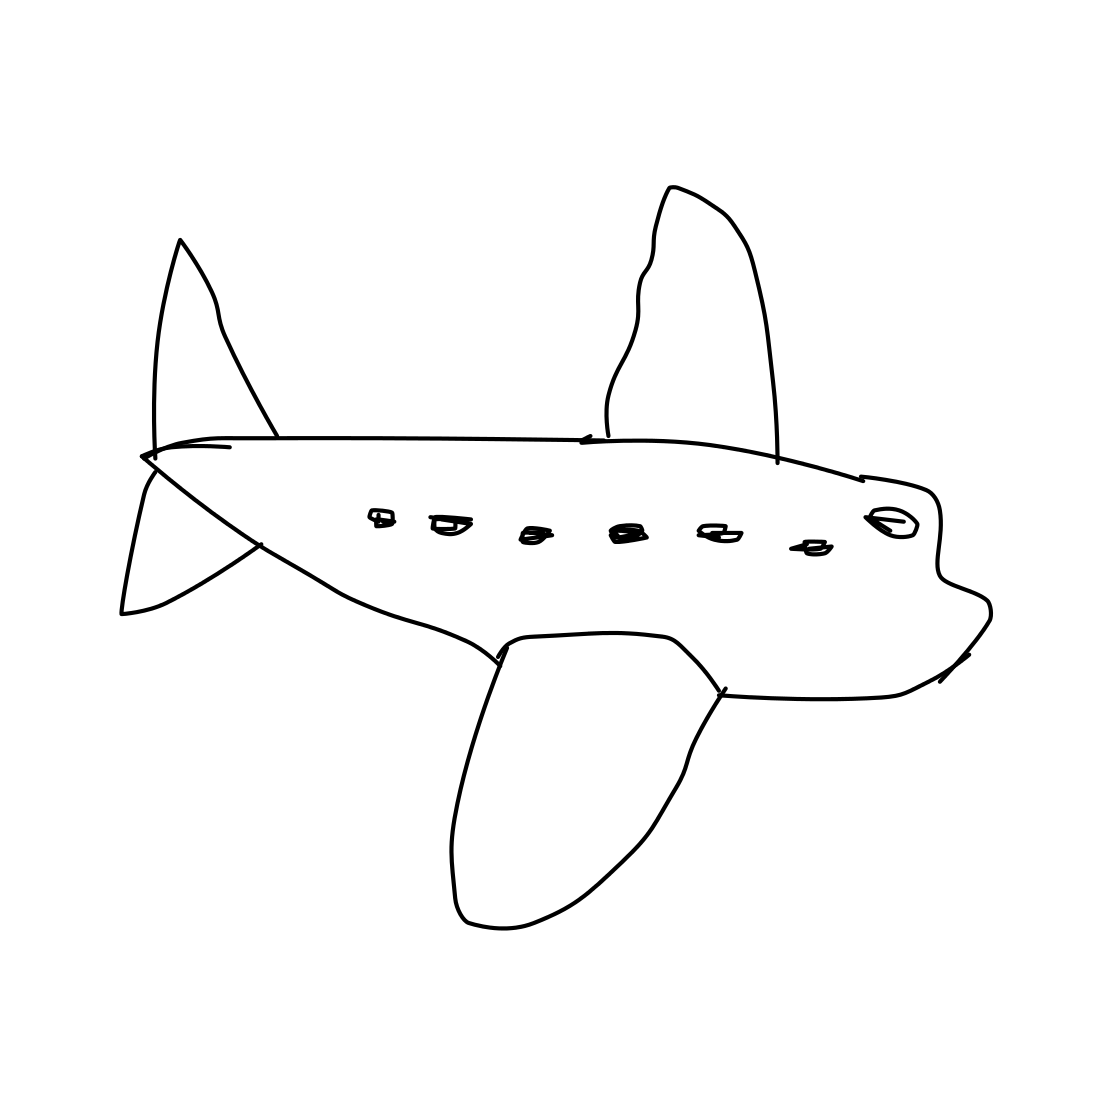

In [10]:
v

In [31]:
import PIL.ImageOps

In [32]:
inverted_image = PIL.ImageOps.invert(v)

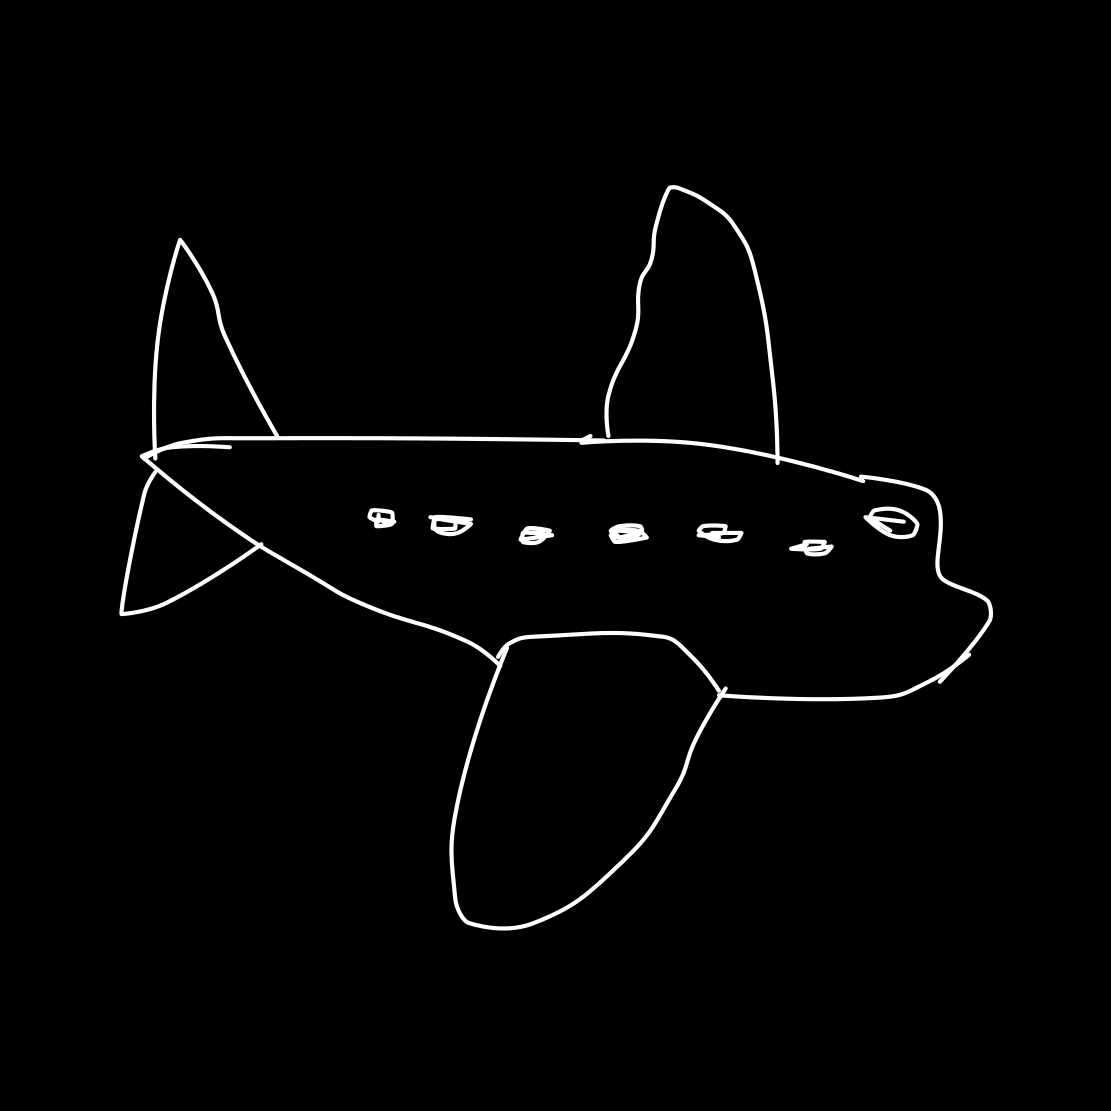

In [33]:
inverted_image

In [11]:
from tensorflow.keras.layers import Conv2D

In [12]:
crops = []

In [13]:
def preprocess_chunks(v, filter_size=(130, 130), stride=(130, 130)):
    i = 0
    j = 0
    while i < len(v):
        while j < len(v[i]):
            crop = v[i:i+filter_size[0], j:j+filter_size[1]]
            crops.append(crop)
            j += stride[1]
        i += stride[0]

In [14]:
import matplotlib.pyplot as plt

In [15]:
import numpy as np

In [16]:
preprocess_chunks(np.array(v))

In [17]:
len(crops)

9

In [18]:
crops[0]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [19]:
class DataVisualizer:
    @staticmethod
    def plot(vec, count=1):
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[16, 16], dpi=(200))
        for i in range(len(axes)):
            axes[i].imshow(vec[i], cmap=plt.get_cmap('gray'), vmin=0, vmax=255., interpolation="none")
        plt.show()

In [21]:
printable_crops = []

In [22]:
for i in crops:
    printable = False
    for j in i.flatten():
        if j != 255:
            printable = True
            printable_crops.append(i)

In [23]:
for i in crops:
#     if (np.average(i) != 255):
#         print(np.average(i))
    if np.average(i) < 250:
        DataVisualizer.plot([i, i])
        input()

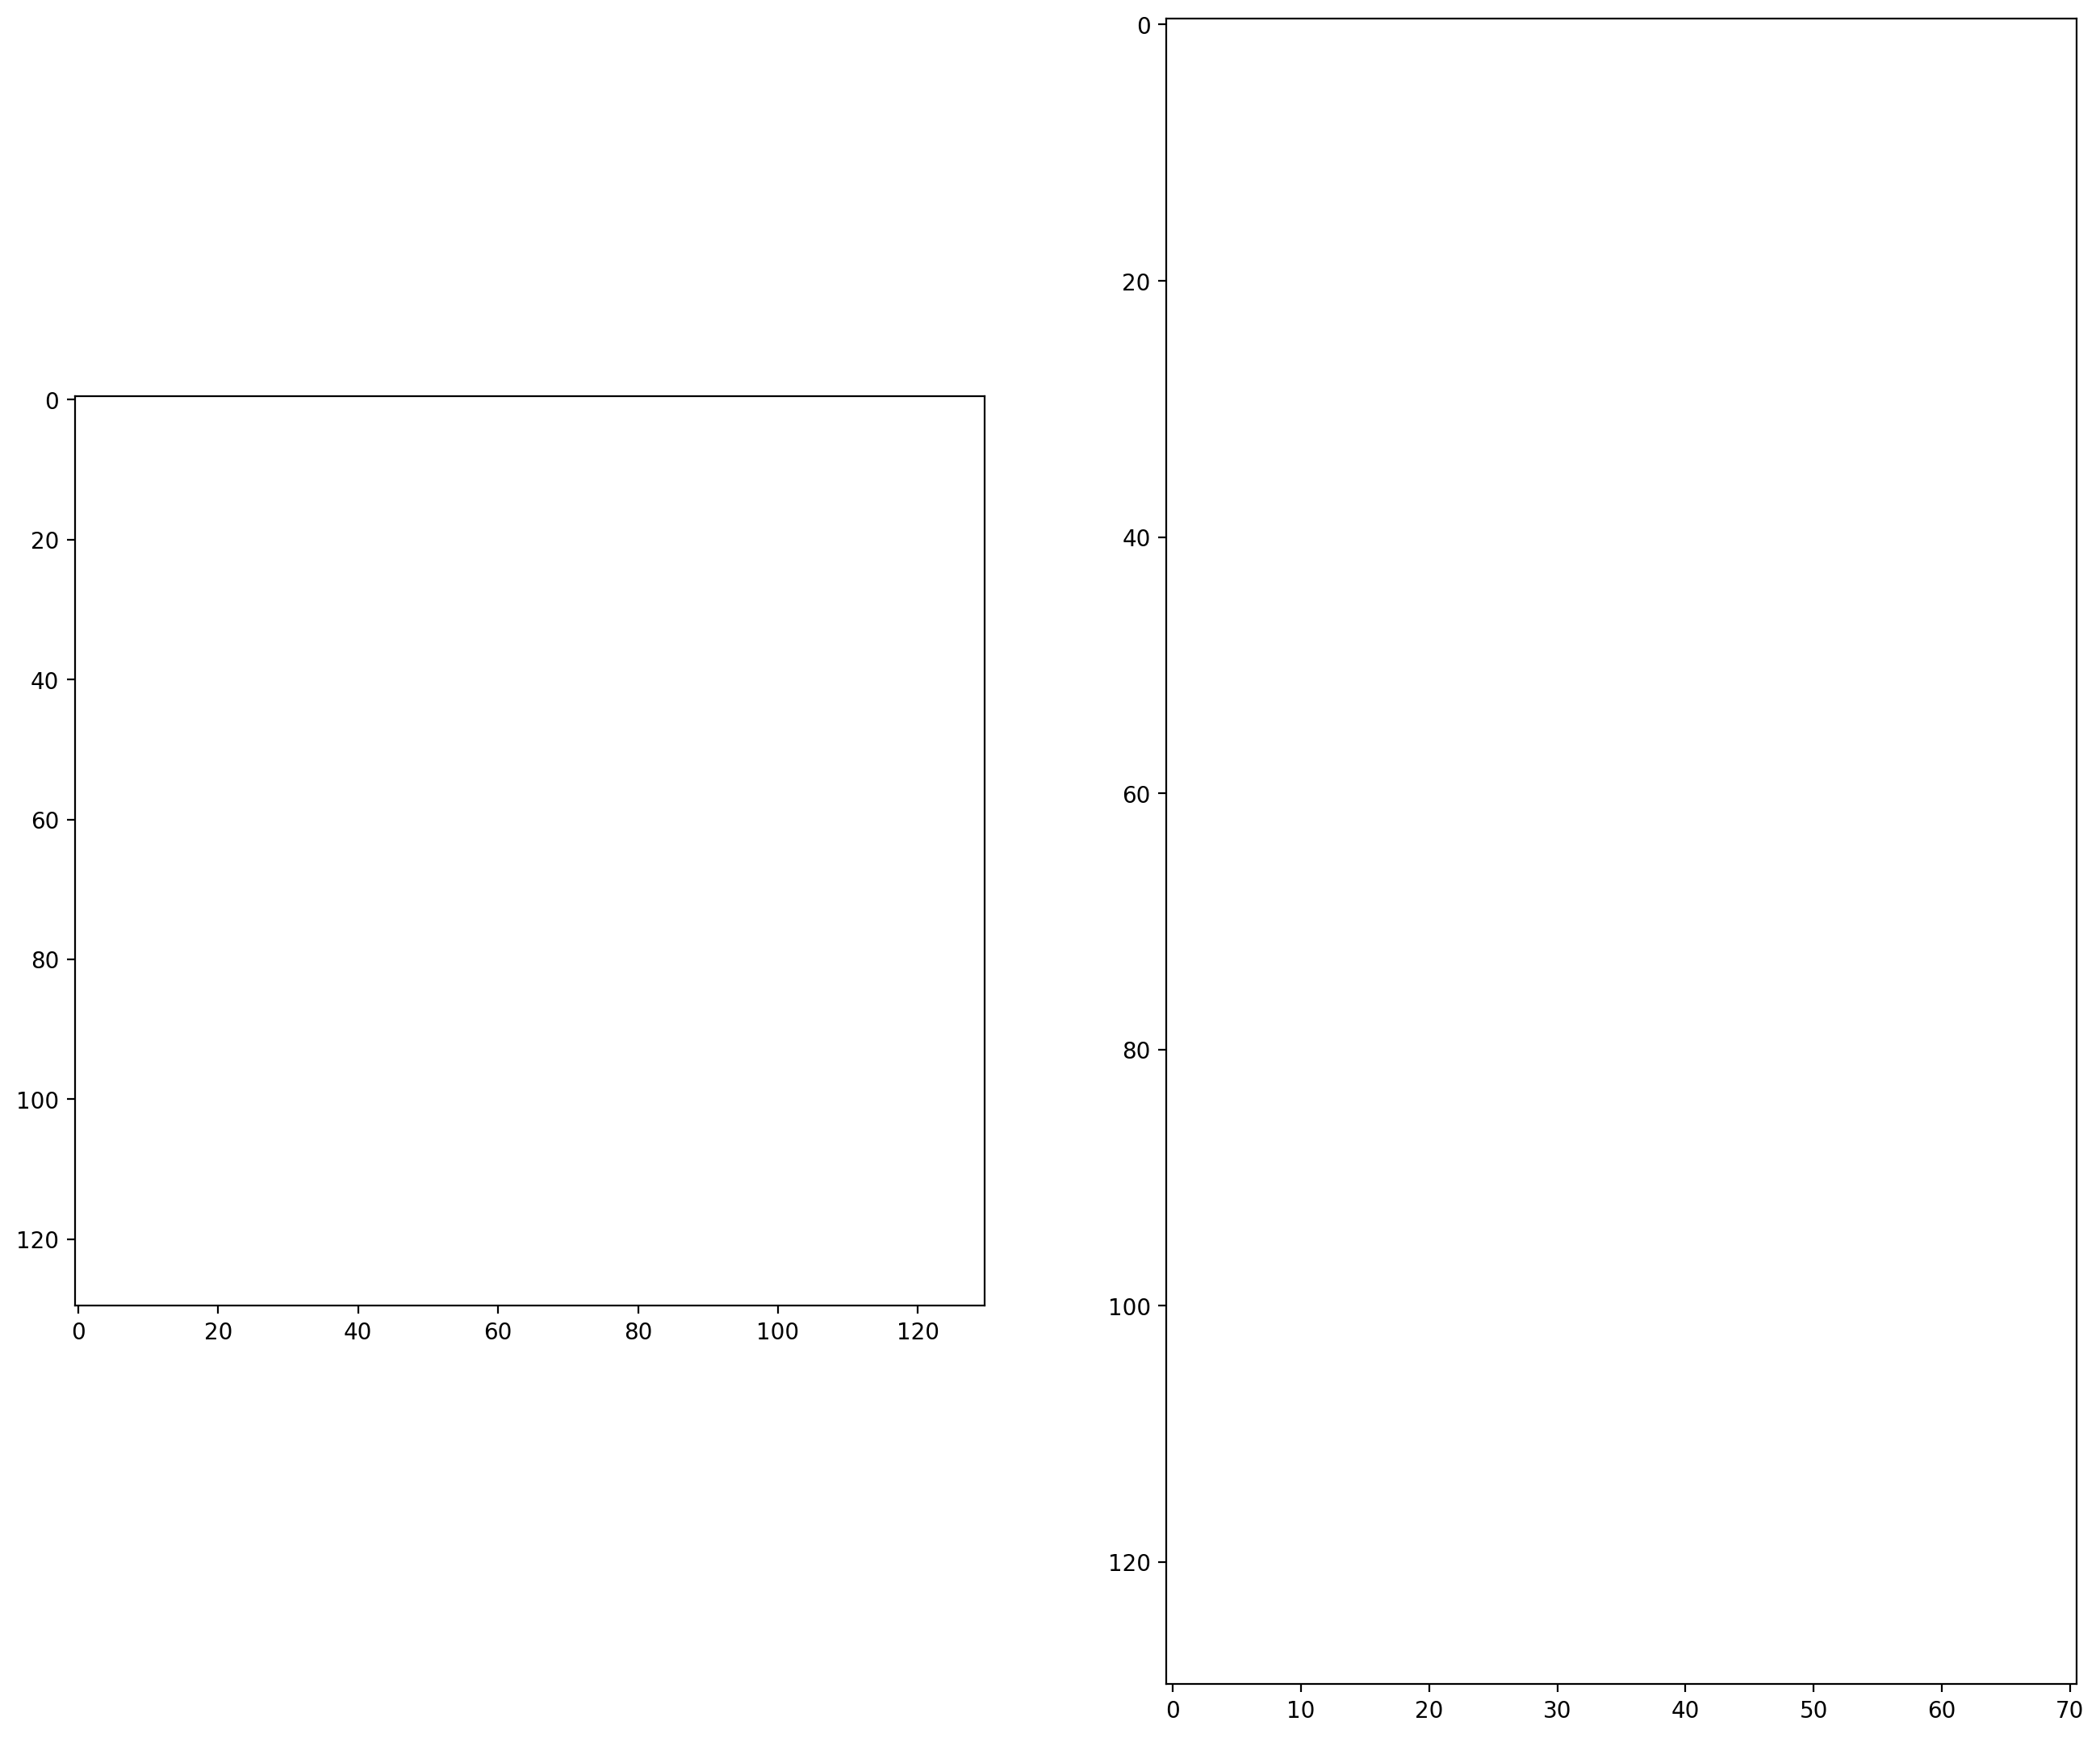

In [24]:
DataVisualizer.plot([crops[0], crops[8]])